In [1]:
# step 1. Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# step 2. Load the data from CSV file

churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
# Step 3. Data pre-processing and selection
# Selecting Columns

churn_df = churn_df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [4]:
# Step 4. Churn data is in float we converting the float into int

churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [5]:
# Info - How many rows and columns are in this dataset in total?

churn_df.shape

(200, 10)

In [6]:
# Info - What are the names of columns

churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [7]:
# Info - How many null / empty values present

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 15.0 KB


In [8]:
# Step 5. Independent var converting into array and storing into x
#         Dependent var converting into array and storing into y

x = np.asarray(churn_df[['tenure','age','address','income','ed','employ','equip']])

y = np.asarray(churn_df[['churn']])

In [9]:
# Info - 

x[0:1] # 1st row

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.]])

In [10]:
# Info -

y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [11]:
# Step 6. Normalise the dataset

x[0:2]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.]])

In [12]:
# above between 11 and 136 difference is huge therefor we have to create standard
# values are in different range therefor ML is not working properly we have to tranform the data

from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)

In [13]:
# After transforming

x[0:1]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695]])

In [14]:
# step 7. Train/Test dataset - spliting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 200)

In [15]:
# Info
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(160, 7) (160, 1)
(40, 7) (40, 1)


In [16]:
# Step 8. Modeling (Logistic Regression with Scikit-learn)
# Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and 
# can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
# solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.
# this optimisers find best values for the tita you have to use each one by one to find good accuracy

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'saga')
LR.fit(x_train, y_train) # training
LR

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='saga')

In [18]:
# Step 9. We can preditct using our test set

yhat = LR.predict(x_test)

yhat[0:4]

array([1, 0, 0, 0])

In [19]:
# predict_proba returns estimates for all classes, ordered by the label of classes. So, the 2nd column is the probability
# of class 1, P(Y=1|X), and first column is probability ofclass 0, P(Y=0|X):

In [20]:
yhat_prob = LR.predict_proba(x_test) # calculating probability
yhat_prob[:4]

array([[0.25586804, 0.74413196],
       [0.79838917, 0.20161083],
       [0.97099504, 0.02900496],
       [0.9610457 , 0.0389543 ]])

In [21]:
# Step 10. Evaluation

from sklearn.metrics import f1_score
f1_score(y_test, yhat)    # here 75% accuracy

0.75

In [22]:
# Info - Plotting is optional

In [23]:
# Info 
x_test

array([[-1.18150902e+00, -1.00927084e+00, -2.61522001e-01,
        -1.01476095e-03,  9.16299467e-01, -1.03245566e+00,
         1.16316000e+00],
       [-2.08692340e-01,  3.70666503e-01,  1.12010367e+00,
         5.37589130e-01,  9.16299467e-01,  3.10576093e-01,
        -8.59726954e-01],
       [ 9.95747358e-01,  1.44395110e+00,  8.24041023e-01,
        -4.77171824e-01, -6.43359200e-01,  1.87744647e+00,
        -8.59726954e-01],
       [ 1.69061641e+00,  2.59389889e+00,  3.58729236e+00,
        -4.77171824e-01, -6.43359200e-01, -4.72859097e-01,
        -8.59726954e-01],
       [ 1.61904490e-01, -1.31592358e+00, -9.52334835e-01,
        -3.83501582e-01, -6.43359200e-01, -6.96697723e-01,
        -8.59726954e-01],
       [ 9.03098150e-01,  8.30645618e-01,  1.02141612e+00,
         4.04889621e-01, -1.42318853e+00,  1.98936579e+00,
        -8.59726954e-01],
       [ 4.39852113e-01, -1.46924996e+00, -9.52334835e-01,
        -3.05443047e-01,  9.16299467e-01, -1.14437497e+00,
         1.1631600

In [24]:
# info - 1 index col values
x_test[:,1] 

array([-1.00927084,  0.3706665 ,  1.4439511 ,  2.59389889, -1.31592358,
        0.83064562, -1.46924996,  2.59389889,  1.59727748,  1.06063518,
        0.3706665 , -0.85594447, -0.7026181 ,  0.52399288,  0.29400332,
       -1.16259721,  0.67731925,  0.83064562, -1.08593403, -1.31592358,
       -0.47262854,  1.06063518, -0.54929173, -0.93260766, -1.46924996,
       -1.2392604 , -0.93260766, -0.85594447, -0.54929173, -0.62595491,
        1.21396155,  0.14067695,  0.06401376,  2.67056208, -0.08931261,
        0.44732969,  1.52061429, -1.08593403, -0.01264943,  0.29400332])

In [25]:
# Info - 2nd last col values
x_test[:,-2]

array([-1.03245566,  0.31057609,  1.87744647, -0.4728591 , -0.69669772,
        1.98936579, -1.14437497,  3.78007479, -0.69669772,  1.2059306 ,
        0.98209197, -0.80861704, -0.58477841,  0.98209197,  1.2059306 ,
       -1.14437497, -0.24902047,  1.54168853, -0.92053635, -1.14437497,
       -0.13710116,  1.65360785,  0.42249541, -0.58477841, -1.14437497,
       -0.92053635,  0.31057609, -0.36093978, -0.02518185, -0.36093978,
       -0.36093978,  0.87017266, -0.24902047,  0.87017266,  0.19865678,
       -0.02518185, -0.24902047, -1.03245566, -0.80861704,  0.75825334])

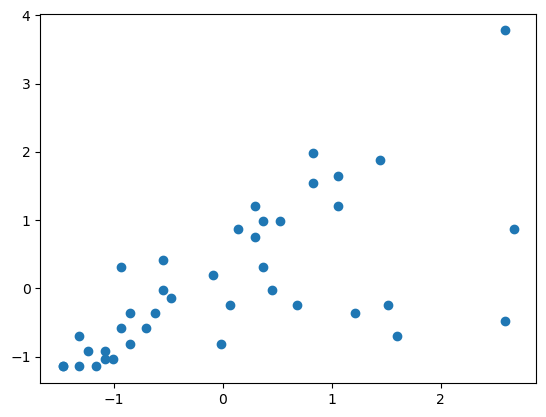

In [26]:
# Step 11. Plotting graph
plt.scatter(x_test[:,1], x_test[:,-2])

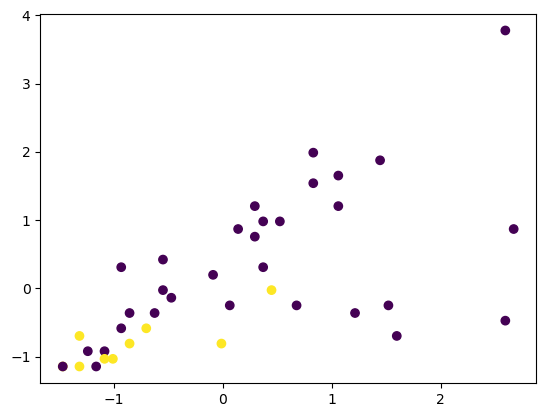

In [27]:
# this is acutal data 
# blue is 0 , yellow is 1

plt.scatter(x_test[:,1],x_test[:,-2], c = y_test)

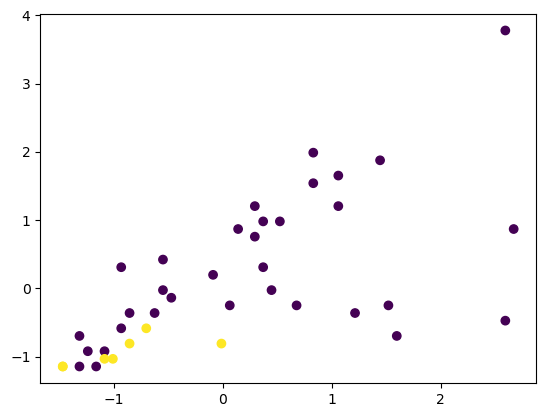

In [28]:
# this o/p by ML

plt.scatter(x_test[:,1], x_test[:,-2], c = yhat)